Задача многоклассовой классификации, которую предлагается решить, построив векторное представление для вершин (ИНН) графа транзакций (динамический, направленный, взвешенный) из файла pays.csv, и, использовав полученные эмбединги вместе с данными о регионах и среднем размере входящих и исходящих транзакций, набором еженедельных сумм вход./исх. транзакций и вход./исх. транзакциями в разрезе отраслей для обучения алгоритма. Эмбеддинги получены на основе [этих статьи и кода](https://www.frontiersin.org/articles/10.3389/fphy.2020.00204/full)

In [33]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
# fldr = "/content/drive/MyDrive/sber_test"
# inn = pd.read_csv(fldr+"/inn_info_public.csv")
# pays = pd.read_csv("pays.csv")
inn = pd.read_csv("inn_info_public.csv")

In [ ]:
inn.describe()

In [ ]:
inn['hash_inn'].nunique()

In [ ]:
# tr_inn = inn.loc[inn['is_public'] == 1]
# tr_inn.reset_index(drop = True, inplace = True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(inn['okved2'], color = 'yellow', edgecolor = 'black',bins = 80)
plt.title('Histogram of okveds')
plt.xlabel('okved')
plt.ylabel('Companies')
plt.show()

In [ ]:
pays.describe()

# Создание признаков

## "Суммовые" признаки

Расчет среднего размера входящей/исходящей транзакции 

In [ ]:
pays['total_dt_sum'] = pays.groupby(['hash_inn_dt'], as_index=False)['sum'].transform(sum)
pays['total_kt_sum'] = pays.groupby(['hash_inn_kt'], as_index=False)['sum'].transform(sum)
pays['total_dt_count'] = pays.groupby(['hash_inn_dt'], as_index=False)['count'].transform(sum)
pays['total_kt_count'] = pays.groupby(['hash_inn_kt'], as_index=False)['count'].transform(sum)
pays['avr_kt_pay'] = pays['total_kt_sum'] / pays['total_kt_count']
pays['avr_dt_pay'] = pays['total_dt_sum'] / pays['total_dt_count']

Сколько компании тратят и получают понедельно

In [ ]:
pays['week_dt_sum'] = pays.groupby(['hash_inn_dt', 'week'], as_index=False)['sum'].transform(sum)
pays['week_kt_sum'] = pays.groupby(['hash_inn_kt', 'week'], as_index=False)['sum'].transform(sum)

In [ ]:
pays.tail()

In [ ]:
dt_weeks = pays.drop_duplicates(subset=['hash_inn_dt', 'week'])\
                    .pivot(columns='week', values='week_dt_sum')\
                        .add_prefix('dt_week_').fillna(0)
kt_weeks = pays.drop_duplicates(subset=['hash_inn_kt', 'week'])\
                    .pivot(columns='week', values='week_kt_sum')\
                        .add_prefix('kt_week_').fillna(0)
pays = pd.concat([pays, dt_weeks, kt_weeks], axis=1)

In [ ]:
# В колонках появились лишние недели, 
# причем если группировать только один ИНН, то такого поведения не наблюдается, 
# возможно в пивот попадают индекс, хотя это не объясняет 23-ю неделю. 
# просто удалим их
pays = pays[pays.columns.difference(['dt_week_23','kt_week_23','dt_week_0','kt_week_0'])]

In [ ]:
pays[list(dt_weeks)[1:23]] = pays.groupby(['hash_inn_dt'], 
                            as_index=False)[list(dt_weeks)[1:23]].transform(sum)
pays[list(kt_weeks)[1:23]] = pays.groupby(['hash_inn_kt'], 
                            as_index=False)[list(kt_weeks)[1:23]].transform(sum)

In [ ]:
pays.head()
pays.to_csv('pays_ad.csv')

Расчет поотраслевой суммы входящих/исходящих транзакций компании

In [ ]:
pays = pd.read_csv("pays_ad.csv",index_col=0)

In [ ]:
pays['dt_okved2'] = pays['dt_okved2'].fillna(value=-2)

In [ ]:
pays['dt_okved2'] = pd.merge(pays, inn, how="left",left_on = ['hash_inn_dt'],\
                            right_on = ['hash_inn'])['okved2']
pays['kt_okved2'] = pd.merge(pays, inn, how="left",left_on = ['hash_inn_kt'],\
                            right_on = ['hash_inn'])['okved2']

In [ ]:
pays['okved_dt_sum'] = pays.groupby(['hash_inn_dt', 'kt_okved2'], as_index=False)[
                                    'sum'].transform(sum)
pays['okved_kt_sum'] = pays.groupby(['hash_inn_kt', 'dt_okved2'], as_index=False)[
                                    'sum'].transform(sum)

In [ ]:
dt_okved = pays.drop_duplicates(subset=['hash_inn_dt', 'kt_okved2'])\
                    .pivot(columns='kt_okved2', values='okved_dt_sum')\
                        .add_prefix('dt_okved_').fillna(0)
kt_okved = pays.drop_duplicates(subset=['hash_inn_kt', 'dt_okved2'])\
                    .pivot(columns='dt_okved2', values='okved_kt_sum')\
                        .add_prefix('kt_okved_').fillna(0)
pays = pd.concat([pays, dt_okved, kt_okved], axis=1)

In [ ]:
pays.to_csv("pays_ad_okv.csv")

In [37]:
dt_clomnx = ['dt_okved_-1',
         'dt_okved_0',
         'dt_okved_1',
         'dt_okved_2',
         'dt_okved_3',
         'dt_okved_4',
         'dt_okved_5',
         'dt_okved_6',
         'dt_okved_7',
         'dt_okved_8',
         'dt_okved_9',
         'dt_okved_10',
         'dt_okved_11',
         'dt_okved_12',
         'dt_okved_13',
         'dt_okved_14',
         'dt_okved_15',
         'dt_okved_16',
         'dt_okved_17',
         'dt_okved_18',
         'dt_okved_19',
         'dt_okved_20',
         'dt_okved_21',
         'dt_okved_22',
         'dt_okved_23',
         'dt_okved_24',
         'dt_okved_25',
         'dt_okved_26',
         'dt_okved_27',
         'dt_okved_28',
         'dt_okved_29',
         'dt_okved_30',
         'dt_okved_31',
         'dt_okved_32',
         'dt_okved_33',
         'dt_okved_34',
         'dt_okved_35',
         'dt_okved_36',
         'dt_okved_37',
         'dt_okved_38',
         'dt_okved_39',
         'dt_okved_40',
         'dt_okved_41',
         'dt_okved_42',
         'dt_okved_43',
         'dt_okved_44',
         'dt_okved_45',
         'dt_okved_46',
         'dt_okved_47',
         'dt_okved_48',
         'dt_okved_49',
         'dt_okved_50',
         'dt_okved_51',
         'dt_okved_52',
         'dt_okved_53',
         'dt_okved_54',
         'dt_okved_55',
         'dt_okved_56',
         'dt_okved_57',
         'dt_okved_58',
         'dt_okved_59',
         'dt_okved_60',
         'dt_okved_61',
         'dt_okved_62',
         'dt_okved_63',
         'dt_okved_64',
         'dt_okved_65',
         'dt_okved_66',
         'dt_okved_67',
         'dt_okved_68',
         'dt_okved_69',
         'dt_okved_70',
         'dt_okved_71',
         'dt_okved_72',
         'dt_okved_73',
         'dt_okved_74',
         'dt_okved_75',
         'dt_okved_76',
         'dt_okved_77',
         'dt_okved_78',
         'dt_okved_79']

kt_clomnx = ['kt_okved_-2.0',
         'kt_okved_-1.0',
         'kt_okved_0.0',
         'kt_okved_1.0',
         'kt_okved_2.0',
         'kt_okved_3.0',
         'kt_okved_4.0',
         'kt_okved_5.0',
         'kt_okved_6.0',
         'kt_okved_7.0',
         'kt_okved_8.0',
         'kt_okved_9.0',
         'kt_okved_10.0',
         'kt_okved_11.0',
         'kt_okved_12.0',
         'kt_okved_13.0',
         'kt_okved_14.0',
         'kt_okved_15.0',
         'kt_okved_16.0',
         'kt_okved_17.0',
         'kt_okved_18.0',
         'kt_okved_19.0',
         'kt_okved_20.0',
         'kt_okved_21.0',
         'kt_okved_22.0',
         'kt_okved_23.0',
         'kt_okved_24.0',
         'kt_okved_25.0',
         'kt_okved_26.0',
         'kt_okved_27.0',
         'kt_okved_28.0',
         'kt_okved_29.0',
         'kt_okved_30.0',
         'kt_okved_31.0',
         'kt_okved_32.0',
         'kt_okved_33.0',
         'kt_okved_34.0',
         'kt_okved_35.0',
         'kt_okved_36.0',
         'kt_okved_37.0',
         'kt_okved_38.0',
         'kt_okved_39.0',
         'kt_okved_40.0',
         'kt_okved_41.0',
         'kt_okved_42.0',
         'kt_okved_43.0',
         'kt_okved_44.0',
         'kt_okved_45.0',
         'kt_okved_46.0',
         'kt_okved_47.0',
         'kt_okved_48.0',
         'kt_okved_49.0',
         'kt_okved_50.0',
         'kt_okved_51.0',
         'kt_okved_52.0',
         'kt_okved_53.0',
         'kt_okved_54.0',
         'kt_okved_55.0',
         'kt_okved_56.0',
         'kt_okved_57.0',
         'kt_okved_58.0',
         'kt_okved_59.0',
         'kt_okved_60.0',
         'kt_okved_61.0',
         'kt_okved_62.0',
         'kt_okved_63.0',
         'kt_okved_64.0',
         'kt_okved_65.0',
         'kt_okved_66.0',
         'kt_okved_67.0',
         'kt_okved_68.0',
         'kt_okved_69.0',
         'kt_okved_70.0',
         'kt_okved_71.0',
         'kt_okved_72.0',
         'kt_okved_73.0',
         'kt_okved_74.0',
         'kt_okved_75.0',
         'kt_okved_76.0',
         'kt_okved_77.0',
         'kt_okved_78.0',
         'kt_okved_79.0']

In [28]:
import pandas as pd
pays = pd.read_csv("pays_ad_okv.csv", usecols = ['hash_inn_dt']+['hash_inn_kt']+dt_cols+kt_cols)

In [3]:
pays[dt_clomnx+kt_clomnx].fillna(.0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [4]:
pays[dt_clomnx] = pays.drop_duplicates(subset=['hash_inn_dt', 'kt_okved2'])\
                       .groupby(['hash_inn_dt'], as_index=False)[dt_clomnx].transform(sum)

In [5]:
pays[kt_clomnx] = pays.drop_duplicates(subset=['hash_inn_kt', 'dt_okved2'])\
                        .groupby(['hash_inn_kt'], 
                            as_index=False)[kt_clomnx].transform(sum)

Сохраним отдельно датасет с агрегированным данными

In [6]:
pays_kt_feats = pays.drop_duplicates(subset=['hash_inn_kt', 'dt_okved2'])\
                    .drop_duplicates(subset=['hash_inn_kt'])
pays_dt_feats = pays.drop_duplicates(subset=['hash_inn_dt', 'kt_okved2'])\
                    .drop_duplicates(subset=['hash_inn_dt'])
pays_feats = pd.concat([pays_kt_feats, pays_dt_feats])
pays_feats

,hash_inn_dt,hash_inn_kt,dt_okved2,kt_okved2,dt_okved_-1,dt_okved_0,dt_okved_1,dt_okved_2,dt_okved_3,dt_okved_4,...,kt_okved_70.0,kt_okved_71.0,kt_okved_72.0,kt_okved_73.0,kt_okved_74.0,kt_okved_75.0,kt_okved_76.0,kt_okved_77.0,kt_okved_78.0,kt_okved_79.0
0,0,0,-1.0,-1,141626.516,0.000,0.0,0.0,1.6,1792.128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,31310,1,12.0,62,20659.780,0.000,0.0,0.0,10.4,293.292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,56371,2,-1.0,-1,855833.464,866.732,0.0,0.0,15.2,1928.328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,17473,3,56.0,29,237.608,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,42499,4,18.0,-1,238.080,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429424,79174,260458,12.0,-1,-0.280,0.000,0.0,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5429425,96970,260458,12.0,-1,0.568,0.000,0.0,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5429673,143637,260487,-1.0,-1,15254.168,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5429829,30189,260503,22.0,61,0.000,0.000,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pays_feats[kt_clomnx+dt_clomnx] = pays_feats[kt_clomnx+dt_clomnx].fillna(.0)

In [11]:
pays_feats.isna().sum()

hash_inn_dt      0
hash_inn_kt      0
dt_okved2        0
kt_okved2        0
dt_okved_-1      0
                ..
kt_okved_75.0    0
kt_okved_76.0    0
kt_okved_77.0    0
kt_okved_78.0    0
kt_okved_79.0    0
Length: 167, dtype: int64

In [12]:
pays_feats.to_csv('pays_feat.csv')

In [29]:
we_kt = pays.drop_duplicates(subset=['hash_inn_kt'])
we_dt = pays.drop_duplicates(subset=['hash_inn_dt'])
pays_ = pd.concat([we_kt, we_dt])
pays_

,avr_dt_pay,avr_kt_pay,dt_week_1,dt_week_10,dt_week_11,dt_week_12,dt_week_13,dt_week_14,dt_week_15,dt_week_16,...,kt_week_22,kt_week_3,kt_week_4,kt_week_5,kt_week_6,kt_week_7,kt_week_8,kt_week_9,total_dt_sum,total_kt_sum
0,159.727120,1306.807155,38628.548,2898.936,1630.168,55733.124,4967.024,2752.644,2196.148,13977.860,...,11547.904,39972.628,2685.492,3634.288,44230.580,79.600,157.420,8609.956,172026.108,253520.588
85,60.852831,9.857143,4968.304,4223.948,3860.816,8598.240,4168.548,4509.796,3973.124,3602.140,...,0.000,0.000,0.000,12.400,12.400,0.000,12.400,25.200,102780.432,138.000
92,1567.877986,7.248000,65115.900,52361.016,46162.248,38357.940,33898.740,7224.752,24045.308,24988.260,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,890554.696,36.240
95,31.942487,13.948000,15.680,135.960,107.124,181.540,250.948,170.876,48.012,1417.692,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3801.156,13.948
96,3.624619,0.564444,34.052,4.760,46.040,0.356,38.400,14.000,0.000,2.936,...,1.180,0.000,0.000,0.000,1.040,0.000,1.540,0.000,304.468,10.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429424,-0.140000,209.199849,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.280,...,3987.752,3258.092,843.516,1369.908,4056.800,1515.816,1755.180,1441.200,-0.280,55437.960
5429425,0.568000,209.199849,0.000,0.000,0.568,0.000,0.000,0.000,0.000,0.000,...,3987.752,3258.092,843.516,1369.908,4056.800,1515.816,1755.180,1441.200,0.568,55437.960
5429673,5084.722667,5084.722667,0.000,0.000,15254.168,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,15254.168,15254.168
5429829,4.720000,29.863089,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14.160,...,143.364,331.908,239.940,787.336,145.524,731.724,88.616,376.188,14.160,6689.332


In [30]:
pays_.isna().sum()

avr_dt_pay      2
avr_kt_pay      2
dt_week_1       0
dt_week_10      0
dt_week_11      0
dt_week_12      0
dt_week_13      0
dt_week_14      0
dt_week_15      0
dt_week_16      0
dt_week_17      0
dt_week_18      0
dt_week_19      0
dt_week_2       0
dt_week_20      0
dt_week_21      0
dt_week_22      0
dt_week_3       0
dt_week_4       0
dt_week_5       0
dt_week_6       0
dt_week_7       0
dt_week_8       0
dt_week_9       0
hash_inn_dt     0
hash_inn_kt     0
kt_week_1       0
kt_week_10      0
kt_week_11      0
kt_week_12      0
kt_week_13      0
kt_week_14      0
kt_week_15      0
kt_week_16      0
kt_week_17      0
kt_week_18      0
kt_week_19      0
kt_week_2       0
kt_week_20      0
kt_week_21      0
kt_week_22      0
kt_week_3       0
kt_week_4       0
kt_week_5       0
kt_week_6       0
kt_week_7       0
kt_week_8       0
kt_week_9       0
total_dt_sum    0
total_kt_sum    0
dtype: int64

In [ ]:
del we_kt, we_dt, pays_kt_feats, pays_dt_feats

## Представление компаний в векторном пространстве 

In [ ]:

import sys
import networkx as nx

import pickle as pickle

class tGraph(object):
    def __init__( self, df_in, output_Gpkl=False ):
        self.G = nx.MultiDiGraph() 
        self.min_time = sys.maxsize
        self.max_time = 0
        self.min_amount = sys.maxsize
        self.max_amount = 0
        
        print("Loading DataFrame...")
        
        edge_key = 0

        for i in df_in.index:
            x = str(int(df_in.hash_inn_kt[i]))
            y = str(int(df_in.hash_inn_dt[i]))
            t = int(df_in.week[i])
            a = df_in['sum'][i]
            
            if self.G.has_edge(x,y,t):
                self.G[x][y][t]['weight'] += a                        
            else:    
                self.G.add_edge(x,y,key=t, weight=a)     
                
            edge_key = edge_key + 1                     
            if t < self.min_time:
                self.min_time = t
            elif t > self.max_time:
                self.max_time = t    

            if output_Gpkl == True:            
                pklfile_G = "paysGraph.pickle"
                with open(pklfile_G, "wb") as f:
                    print("Writing", pklfile_G, "...")
                    pickle.dump( self.G, pklfile_G, pickle.HIGHEST_PROTOCOL )

        self.number_of_nodes = self.G.number_of_nodes()
        self.number_of_edges = self.G.number_of_edges()
        print("Summary of graph:")
        print("Number of nodes: ", self.number_of_nodes)
        print("Number of edges: ", self.number_of_edges)
        print("Number of edge_key: ", edge_key)
        print("Min time: ", self.min_time) 
        print("Max time: ", self.max_time) 

In [ ]:

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(original_array):
    x = np.array(original_array)
    max = np.max(x)
    return np.exp(x-max) / np.sum(np.exp(x-max))

def tanh(original_array):
    x = np.array(original_array)
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


In [ ]:
import random
#random.seed(32)
#np.random.seed(32)

def weight_choice(unnormalized_probs): 
    if len(unnormalized_probs) > 0: 
        norm_const = sum(unnormalized_probs)
        normalized_probs = [ float(u_prob / norm_const) 
                            for u_prob in unnormalized_probs] 
    
        J = alias_setup(normalized_probs)[0]
        q = alias_setup(normalized_probs)[1]
        idx = alias_draw(J, q)        
    return idx


def alias_setup(probs):

    K = len(probs)
    q = np.zeros(K, dtype=np.float32)
    J = np.zeros(K, dtype=np.int32)

    smaller = []
    larger = []
    for kk, prob in enumerate(probs):
        q[kk] = K*prob
        if q[kk] < 1.0:
            smaller.append(kk)
        else:
            larger.append(kk)

    while len(smaller) > 0 and len(larger) > 0:
        small = smaller.pop()
        large = larger.pop()

        J[small] = large
        q[large] = q[large] + q[small] - 1.0
        if q[large] < 1.0:
            smaller.append(large)
        else:
            larger.append(large)

    return J, q


def alias_draw(J, q):
    '''
    Draw sample from a non-uniform discrete distribution using alias sampling.
    '''
    K = len(J)

    kk = int(np.floor(np.random.rand()*K))
    if np.random.rand() < q[kk]:
        return kk
    else:
        return J[kk]


In [ ]:

import time
from gensim.models import Word2Vec
import random
import numpy as np


class tGraphNE(object):
    
    def __init__(self, tG,  time_biased_type, first_biased_type, amount_biased, \
                 alpha,  dimensions, num_walks, walk_length, output, \
                 output_pklG = False, window_size=10, workers=8, hs=1):
        self.G = tG.G
        self.min_time = tG.min_time
        self.max_time = tG.max_time
        
        self.time_biased_type = time_biased_type 
        self.first_biased_type = first_biased_type    
        self.amount_biased = amount_biased
        self.alpha = alpha
        print("Walking...")
        t1 = time.time()
        walks = self.simulate_walks(num_walks, walk_length)
        t2 = time.time()
        print("  Walking time:", t2-t1)
        
        print("Learn embeddings...")   
        
        #walks = [map(str, walk) for walk in walks]        
        word2vec_model = Word2Vec(sentences = walks, size= dimensions, window= window_size, min_count=0, sg=1, hs=1, workers= workers)
        t3 = time.time()
        print("Learn embeddings time:", t3-t2) 
        
        self.vectors = {}
        for word in list(self.G.nodes()):
            self.vectors[str(word)] = word2vec_model.wv[str(word)]            

        print("  Embeddings are saved in ", output)
        word2vec_model.wv.save_word2vec_format(output)
        
        del word2vec_model
        
        return

    
    def simulate_walks(self, num_walks, walk_length):

        G = self.G
        walks = []
        nodes = list(G.nodes())
        print("Walk iteration:")
        for walk_iter in range(num_walks):
            print(str(walk_iter+1), '/', str(num_walks))
            random.shuffle(nodes)
            for node in nodes:
                walks.append(self.temporal_walk( walk_length = walk_length, start_node = node ))      
        return walks
            
    def temporal_walk(self, walk_length, start_node):        
       
        walk = [start_node] 
        walk_edge = []
        walk_time = [] 
        # walk_key = []
        
        cur = start_node
        next_node, next_time, next_key = self.get_first_step(cur)
        if next_node != None:
            walk.append(next_node)
            walk_time.append(next_time)
            walk_edge.append(next_key)
        else:
            return walk
        
        while len(walk) < walk_length:
            prevtime = walk_time[-1]
            cur = walk[-1]  
            next_node, next_time, next_key = self.get_next_step(cur, prevtime)
            if next_node != None:
                walk.append(next_node)
                walk_time.append(next_time)
                walk_edge.append(next_key)
            else:
                break
        return walk
    
    def get_first_step(self, cur):
        G = self.G
        tmp_key = []
        tmp_node = []
        tmp_time = []
        unnormalized_probs_t = []
        
        cur_nbrs = list(G.neighbors(cur))
        if self.time_biased_type == "simple_graph":
            for nbr in cur_nbrs:
                tmp_node.append(nbr)
                unnormalized_probs_t.append(1)                
                
            if len(unnormalized_probs_t) > 0:
                idx = weight_choice(unnormalized_probs_t)
                next_node = tmp_node[idx]
                next_time = 0 
                next_key = 0
                return next_node, next_time, next_key
            else:
                return None, None, None     

        else:
            for nbr in cur_nbrs:
                nbr_key = list(G.get_edge_data(cur,nbr))           
                for k in nbr_key:
                    t = k             
                    if self.first_biased_type == "time_uniform":
                        unnormalized_probs_t.append(1)
                    elif self.first_biased_type == "time_freq":
                        unnormalized_probs_t.append(self.max_time-t+1)
                    elif self.first_biased_type == "time_close_linear":
                        unnormalized_probs_t.append(self.max_time-t+1)
                    elif self.first_biased_type == "time_far":
                        unnormalized_probs_t.append(t-self.min_time+1) 
                    elif self.first_biased_type == "time_far_linear":
                        unnormalized_probs_t.append(t)
                    
                    tmp_node.append(nbr)
                    tmp_time.append(t)
                    tmp_key.append(k)
                
            if self.first_biased_type == "time_close_linear" :
                unnormalized_probs_t = linear_rank_mapping( unnormalized_probs_t, order='descending' )
            elif self.first_biased_type == "time_far_linear":
                unnormalized_probs_t = linear_rank_mapping( unnormalized_probs_t )
            
    
            if len(unnormalized_probs_t) > 0:
                selected = weight_choice(unnormalized_probs_t)               
                next_node = tmp_node[selected]
                next_time = tmp_time[selected]        
                next_key = tmp_key[selected]   
                return next_node, next_time, next_key
            
            else:
                return None, None, None 
        
        
    def get_next_step(self, cur, prevtime=0):

        G = self.G
        
        tmp_key = []
        tmp_node = []
        tmp_time = []
        unnormalized_probs_t = []
        unnormalized_probs_a = []

        cur_nbrs = list(G.neighbors(cur))
        if self.time_biased_type == "simple_graph": #DeepWalk
            for nbr in cur_nbrs:
                tmp_node.append(nbr)
                unnormalized_probs_t.append(1)                
                
            if len(unnormalized_probs_t) > 0:
                idx = weight_choice(unnormalized_probs_t)
                next_node = tmp_node[idx]
                next_time = 0 
                next_key = 0
                return next_node, next_time, next_key
            else:
                return None, None, None  
        else:    
            for nbr in cur_nbrs:
                nbr_key = list(G.get_edge_data(cur,nbr))            
                for k in nbr_key:
                    t = k
                    a = G[cur][nbr][k]['weight']
                    if self.time_biased_type == "no_time_limit":
                        unnormalized_probs_t.append(1)
                    
                    elif t >= prevtime:
                        unnormalized_probs_a.append(a)
                        
                        if self.time_biased_type == "time_uniform"  :
                            unnormalized_probs_t.append(1)
                        elif self.time_biased_type == "time_close_raw"  :
                            unnormalized_probs_t.append( self.max_time - t + 1 )
                        elif self.time_biased_type == "time_close_exp"  :
                            unnormalized_probs_t.append( t - prevtime )
                        else:
                            unnormalized_probs_t.append( t - prevtime + 1 )
                        tmp_time.append(t)
                        tmp_node.append(nbr)
                        tmp_key.append(k)
                        

            if self.time_biased_type == "time_close_linear" :
                unnormalized_probs_t = linear_rank_mapping( unnormalized_probs_t,
                                                           order='descending' )
            elif self.time_biased_type == "time_far_linear" :
                unnormalized_probs_t = linear_rank_mapping( unnormalized_probs_t)   
            elif self.time_biased_type == "time_freq_tanh":
                unnormalized_probs_t = tanh(unnormalized_probs_t)
            elif self.time_biased_type == "time_close_exp":
                unnormalized_probs_t = softmax(unnormalized_probs_t)

            if self.amount_biased == "amount_linear":
                unnormalized_probs_a = linear_rank_mapping(unnormalized_probs_a)
            elif self.amount_biased == "amount_tanh":
                unnormalized_probs_a = tanh(unnormalized_probs_a)
            elif self.amount_biased == "amount_exp":
                unnormalized_probs_a = softmax(unnormalized_probs_a)

            
            if len(unnormalized_probs_t) > 0: #有符合条件的下一个点
                if self.amount_biased != "amount_uniform":
                    unnormalized_probs = combine_probs(unnormalized_probs_t, 
                                                       unnormalized_probs_a, self.alpha)        
                else:
                    unnormalized_probs = unnormalized_probs_t
                    
                selected = weight_choice(unnormalized_probs)               
                next_node = tmp_node[selected]  
                next_time = tmp_time[selected]        
                next_key = tmp_key[selected]   
                return next_node, next_time, next_key  
            
            else:
                return None, None, None  

    
def linear_rank_mapping( original_array, order='ascending' ):
    x = np.array(original_array)
    if order == 'ascending':
        return (np.argsort(x) + 1)
    elif order == 'descending':  
        return (np.argsort(-x) + 1)  
        # return (x.argsort() + 1)
        
def normalized_probs(unnormalized_probs):
    if len(unnormalized_probs) > 0:
        norm_const = sum(unnormalized_probs)
        normalized_probs = [ u_prob / norm_const for u_prob in unnormalized_probs]

    return normalized_probs    
    
def combine_probs(p1, p2, alpha) :
    probs1 = normalized_probs(p1)
    probs2 = normalized_probs(p2)

    if len(probs1) != len(probs2):
        print("ERROR", "len(probs1) != len(probs2)" )
                          
    combine_probs = np.multiply( np.power(probs1, alpha), np.power(probs2, 1-alpha) )        
    
    return combine_probs


In [ ]:
pays = pd.read_csv('pays_ad.csv', index_col=0)

# Graph construction
dataset = "pays"
df = pays.loc[:, ['hash_inn_dt','hash_inn_kt','week','sum',]]

tG = tGraph(df)
print(tG)

# Parameter setting
dimensions = 128
window_size =  8
workers = 8
num_walks = 1
walk_length = 20

#------------ Embedding -----------------#
first_biased_type = "time_uniform"  # time_uniform
time_biased_type = "time_close_linear"
#  ["time_uniform", "time_close_linear", "time_close_raw", "time_far_linear", "time_close_exp", "time_freq_tanh", "time_close_exp"]
amount_biased = "amount_uniform"  #amount_linear, amount_uniform, amount_raw
alpha = 0.8
output = time_biased_type+ "_" + amount_biased + "_wl" + str(walk_length) + "_ws" + str(window_size) + "nw" + str(num_walks) + \
          "dim" + str(dimensions) +"_" + dataset + "_df_train.txt"
tGraphNE(tG, time_biased_type, first_biased_type, amount_biased, alpha, dimensions, num_walks, walk_length, output)

In [17]:
fin = open("time_uniform_amount_uniform_wl20_ws4nw1dim128_pays_df_train.txt", 'r')
node_num, size = [int(x) for x in fin.readline().strip().split()]
vectors = []
while 1:
    l = fin.readline()
    if l == '':
        break
    vec = l.strip().split(' ')
    assert len(vec) == size+1
    vectors.append([float(x) for x in vec])
fin.close()


## Объединим все вместе

In [18]:
embed_df = pd.DataFrame.from_records(vectors)
embed_df.rename(columns={0: 'hash_inn'}, inplace=True)
embed_df['hash_inn'] = embed_df['hash_inn'].astype('int64')
data = pd.merge(inn.iloc[:, :-1], embed_df, how="left",on = ['hash_inn'])

In [20]:
# pays_feats = pd.read_csv('pays_feat.csv',index_col=0)

list(pays_feats)
dt_cols = [ 'hash_inn_dt',
    'avr_dt_pay',
    'dt_week_1',
    'dt_week_10',
    'dt_week_11',
    'dt_week_12',
    'dt_week_13',
    'dt_week_14',
    'dt_week_15',
    'dt_week_16',
    'dt_week_17',
    'dt_week_18',
    'dt_week_19',
    'dt_week_2',
    'dt_week_20',
    'dt_week_21',
    'dt_week_22',
    'dt_week_3',
    'dt_week_4',
    'dt_week_5',
    'dt_week_6',
    'dt_week_7',
    'dt_week_8',
    'dt_week_9',
    'total_dt_sum']
kt_cols = ['hash_inn_kt',
    'avr_kt_pay',
    'kt_week_1',
    'kt_week_10',
    'kt_week_11',
    'kt_week_12',
    'kt_week_13',
    'kt_week_14',
    'kt_week_15',
    'kt_week_16',
    'kt_week_17',
    'kt_week_18',
    'kt_week_19',
    'kt_week_2',
    'kt_week_20',
    'kt_week_21',
    'kt_week_22',
    'kt_week_3',
    'kt_week_4',
    'kt_week_5',
    'kt_week_6',
    'kt_week_7',
    'kt_week_8',
    'kt_week_9',
    'total_kt_sum'
]

In [27]:
list(pays_)

['hash_inn_dt',
 'hash_inn_kt',
 'dt_okved2',
 'kt_okved2',
 'dt_okved_-1',
 'dt_okved_0',
 'dt_okved_1',
 'dt_okved_2',
 'dt_okved_3',
 'dt_okved_4',
 'dt_okved_5',
 'dt_okved_6',
 'dt_okved_7',
 'dt_okved_8',
 'dt_okved_9',
 'dt_okved_10',
 'dt_okved_11',
 'dt_okved_12',
 'dt_okved_13',
 'dt_okved_14',
 'dt_okved_15',
 'dt_okved_16',
 'dt_okved_17',
 'dt_okved_18',
 'dt_okved_19',
 'dt_okved_20',
 'dt_okved_21',
 'dt_okved_22',
 'dt_okved_23',
 'dt_okved_24',
 'dt_okved_25',
 'dt_okved_26',
 'dt_okved_27',
 'dt_okved_28',
 'dt_okved_29',
 'dt_okved_30',
 'dt_okved_31',
 'dt_okved_32',
 'dt_okved_33',
 'dt_okved_34',
 'dt_okved_35',
 'dt_okved_36',
 'dt_okved_37',
 'dt_okved_38',
 'dt_okved_39',
 'dt_okved_40',
 'dt_okved_41',
 'dt_okved_42',
 'dt_okved_43',
 'dt_okved_44',
 'dt_okved_45',
 'dt_okved_46',
 'dt_okved_47',
 'dt_okved_48',
 'dt_okved_49',
 'dt_okved_50',
 'dt_okved_51',
 'dt_okved_52',
 'dt_okved_53',
 'dt_okved_54',
 'dt_okved_55',
 'dt_okved_56',
 'dt_okved_57',
 'dt_o

In [31]:
# pays = pd.read_csv("pays_ad.csv",index_col=0)

data[dt_cols] = pd.merge(data, pays_[dt_cols],\
                            how="left",left_on = ['hash_inn'],\
                            right_on = ['hash_inn_dt'])[dt_cols].fillna(.0)
data[kt_cols] = pd.merge(data, pays_[kt_cols],\
                            how="left",left_on = ['hash_inn'],\
                            right_on = ['hash_inn_kt'])[kt_cols].fillna(.0)
data

,hash_inn,okved2,region,1,2,3,4,5,6,7,...,kt_week_21,kt_week_22,kt_week_3,kt_week_4,kt_week_5,kt_week_6,kt_week_7,kt_week_8,kt_week_9,total_kt_sum
0,61058,34,86,0.000246,0.002482,-0.001123,0.001494,-0.000022,-0.003650,0.001696,...,0.0,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000
1,8311,18,86,0.038560,0.015556,-0.053023,-0.056549,-0.064540,0.029007,0.034516,...,0.0,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000
2,130273,-1,86,0.013225,-0.019508,-0.012554,0.022190,0.069374,0.036308,-0.052165,...,0.0,0.00,305.600,0.00,0.000,0.000,0.000,0.00,0.000,611.200
3,64081,43,86,-0.002754,0.000334,-0.000766,-0.001014,0.002623,0.003123,0.001458,...,0.0,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000
4,218005,12,86,0.055363,0.025905,-0.027972,0.047224,-0.035240,0.046902,-0.006553,...,0.0,0.00,0.000,0.00,0.000,521.672,159.600,50.00,0.000,779.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,0.156380,-0.435135,-0.430756,-0.059265,-0.205538,0.453722,0.219463,...,0.0,9.44,14.464,8.86,1.124,-0.016,0.024,8.86,2.536,111.404
240065,13553,12,12,0.009301,-0.005343,-0.021260,0.098461,-0.052544,0.088812,-0.068021,...,0.0,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000
240066,230402,12,12,0.110283,-0.025396,0.017472,0.023012,-0.066578,0.028567,0.097770,...,0.0,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000
240067,170104,63,12,0.278620,0.066956,-0.488140,-0.126369,0.009912,0.092439,0.099501,...,0.0,0.00,0.000,0.00,0.000,0.000,0.000,0.00,0.000,0.000


In [38]:
data[dt_clomnx] = pd.merge(data, pays_feats[dt_clomnx+['hash_inn_dt']],\
                            how="left",left_on = ['hash_inn'],\
                            right_on = ['hash_inn_dt'])[dt_clomnx].fillna(.0)
data[kt_clomnx] = pd.merge(data, pays_feats[kt_clomnx+['hash_inn_kt']],\
                            how="left",left_on = ['hash_inn'],\
                            right_on = ['hash_inn_kt'])[kt_clomnx].fillna(.0)
data

,hash_inn,okved2,region,1,2,3,4,5,6,7,...,kt_okved_70.0,kt_okved_71.0,kt_okved_72.0,kt_okved_73.0,kt_okved_74.0,kt_okved_75.0,kt_okved_76.0,kt_okved_77.0,kt_okved_78.0,kt_okved_79.0
0,61058,34,86,0.000246,0.002482,-0.001123,0.001494,-0.000022,-0.003650,0.001696,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,8311,18,86,0.038560,0.015556,-0.053023,-0.056549,-0.064540,0.029007,0.034516,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2,130273,-1,86,0.013225,-0.019508,-0.012554,0.022190,0.069374,0.036308,-0.052165,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
3,64081,43,86,-0.002754,0.000334,-0.000766,-0.001014,0.002623,0.003123,0.001458,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
4,218005,12,86,0.055363,0.025905,-0.027972,0.047224,-0.035240,0.046902,-0.006553,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240064,139170,4,12,0.156380,-0.435135,-0.430756,-0.059265,-0.205538,0.453722,0.219463,...,0.0,0.0,0.0,0.0,62.424,0.0,0.0,0.0,0.0,0.0
240065,13553,12,12,0.009301,-0.005343,-0.021260,0.098461,-0.052544,0.088812,-0.068021,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
240066,230402,12,12,0.110283,-0.025396,0.017472,0.023012,-0.066578,0.028567,0.097770,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
240067,170104,63,12,0.278620,0.066956,-0.488140,-0.126369,0.009912,0.092439,0.099501,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0


In [39]:
data.to_csv('data.csv')

In [2]:
import pandas as pd
data = pd.read_csv('data.csv',index_col=0)

In [3]:
data.reset_index(drop = True, inplace = True)
print(data.shape[0])

240069


In [4]:
data.dropna(inplace=True)
data.shape[0]

240069

In [69]:
# from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [5]:
list(data)

['hash_inn',
 'okved2',
 'region',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 'hash_inn_dt',
 'avr_dt_pay',
 'dt_week_1',
 'dt

In [6]:
data = pd.concat([data, pd.get_dummies(data['region'], prefix='region_')], axis=1)

col2rem = ['region','hash_inn','hash_inn_dt','hash_inn_kt','dt_okved_-1','kt_okved_-2.0','kt_okved_-1.0']
data = data[data.columns.difference(col2rem)]

In [7]:
list(data)

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 'avr_dt_pay',
 'avr_kt_pay',
 'dt_okved_0',
 'dt_okved_1',
 'dt_okved_10',
 'dt_okv

In [8]:
tr_df = data.loc[data['okved2'] != -1]

In [9]:
tst_df = data.loc[data['okved2'] == -1]

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# columns_to_encode = columns_onh
# columns_to_scale  = list(data)
# columns_to_scale.remove('region')

# # Нормализуем векторы чиленных признаков и 1-hot для регионов
# scaled_columns  = scaler.fit_transform(data[columns_to_scale]) 
# encoded_columns =    ohe.fit_transform(data[columns_to_encode])

# data = pd.concat([scaled_columns, encoded_columns], axis = 1)
# print(data.shape[0])
# data.to_csv('data_enc.csv')

In [11]:
# Разбиение трейн вал и тест
train_df, test_df = train_test_split(tr_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

train_labels = np.array(train_df['okved2'])
val_labels = np.array(val_df['okved2'])
test_labels = np.array(test_df['okved2'])

train_features = np.array(train_df.loc[:, train_df.columns != 'okved2'])
val_features = np.array(val_df.loc[:, val_df.columns != 'okved2'])
test_features = np.array(test_df.loc[:, test_df.columns != 'okved2'])

In [78]:
train_features[1]

array([-2.43900460e-03, -2.20939750e-03, -3.01951160e-04,  2.01656880e-04,
       -2.19434130e-03, -3.38986330e-03, -1.51208110e-03, -3.03135770e-03,
        3.04679530e-03, -7.43073640e-04,  2.13142950e-03, -1.41701660e-04,
       -1.18511280e-04, -2.38591040e-03, -3.59034540e-04, -1.86189360e-03,
        9.28261430e-04,  1.70551680e-03, -3.17623140e-03, -1.20372830e-03,
        3.02231920e-03,  1.75643330e-03, -8.36885000e-04, -1.40682540e-03,
       -4.68394500e-04, -8.58887500e-04,  6.39744900e-04, -2.31057030e-03,
        1.22485540e-03,  1.14128650e-03, -1.68127240e-03,  2.69408130e-03,
        1.62189430e-03,  4.87540380e-04,  6.53108640e-04, -3.37594330e-03,
       -8.73059440e-04,  1.39274430e-04, -9.90073460e-05, -3.17008900e-03,
        2.63358930e-03,  1.10400410e-03,  3.45387400e-03,  5.84396600e-04,
       -3.41121180e-03,  3.36461890e-03, -2.38358570e-04,  3.69666700e-03,
       -9.11748900e-04, -3.36838600e-03,  5.21065550e-04,  1.07827880e-03,
       -1.12024420e-03, -

In [12]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (103305,)
Validation labels shape: (25827,)
Test labels shape: (32283,)
Training features shape: (103305, 427)
Validation features shape: (25827, 427)
Test features shape: (32283, 427)


In [80]:
train_features[0]

array([-7.91389429e-01,  9.14607204e-02,  9.12426292e-01, -6.46424169e-01,
        5.66529459e-01, -5.97468068e-02, -7.29993794e-01, -1.11579817e-01,
       -1.52826025e-01, -5.44327880e-01,  1.01642321e+00,  4.62845758e-02,
       -7.70429089e-01,  7.39512887e-02, -4.54157205e-01, -2.35586724e-01,
        1.42021664e-01, -1.34297904e-01, -1.45731694e-01,  2.90352950e-01,
       -4.35701442e-01, -9.43120293e-02, -1.14257001e+00, -2.44155110e-01,
       -1.32329858e-01,  2.16872532e-01,  4.08098099e-01,  2.48704023e-01,
       -6.46618732e-01,  6.65694317e-01, -6.74759961e-01, -4.51255285e-01,
        6.10601190e-03, -2.21910670e-01,  6.83928196e-02, -7.48169541e-01,
        4.28171747e-01,  3.26171272e-01,  4.03231745e-01, -2.31593208e-01,
        1.21972384e-01, -1.85680740e-01,  4.49495938e-01, -6.45864599e-01,
        5.18557314e-02,  1.06725464e-01, -6.85068894e-01, -5.30078125e-01,
       -8.13131428e-01,  4.73225383e-01, -2.25498438e-01,  4.39788925e-01,
       -6.67175698e-01, -

In [13]:
import tensorflow as tf

In [14]:
import keras

model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, activation='linear',input_shape=(train_features.shape[-1],),
#                             kernel_initializer=initializers.RandomNormal(stddev=0.5),
#                             bias_initializer=initializers.RandomNormal(stddev=0.1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.LeakyReLU(alpha=0.3),
#     tf.keras.layers.Dropout(rate=0.3),
#     tf.keras.layers.Dense(256, activation='elu',
#                             kernel_initializer=initializers.RandomNormal(stddev=0.5),
#                             bias_initializer=initializers.RandomNormal(stddev=0.1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2048, activation='elu',input_shape=(train_features.shape[-1],)
                         ),
    tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.LeakyReLU(alpha=0.1),
#     tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(80)
])

Using TensorFlow backend.


In [15]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=100000,
    decay_rate=0.9)

model.compile(optimizer='adam', learning_rate=lr_schedule,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#from_logits=True
              metrics=['sparse_categorical_accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              876544    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                20560     
Total params: 1,421,648
Trainable params: 1,421,648
Non-trainable params: 0
_________________________________________________________________


In [36]:
from collections import Counter
EPOCHS = 10
BATCH_SIZE = 8092
class_weight = {cl: n_sampls for cl, n_sampls in Counter(y_resampled).items()}

In [37]:
train_process = model.fit(
    X_resampled, y_resampled,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_X_resampled, val_y_resampled),
    class_weight=class_weight)

Train on 80000 samples, validate on 16000 samples
Epoch 1/10
80000/80000 [==============================] - 5s 62us/sample - loss: 4177.5367 - sparse_categorical_accuracy: 0.0852 - val_loss: 4229.5533 - val_sparse_categorical_accuracy: 0.0733
Epoch 2/10
80000/80000 [==============================] - 4s 50us/sample - loss: 3776.1233 - sparse_categorical_accuracy: 0.1515 - val_loss: 4229.1494 - val_sparse_categorical_accuracy: 0.0790
Epoch 3/10
80000/80000 [==============================] - 4s 50us/sample - loss: 3566.9429 - sparse_categorical_accuracy: 0.1944 - val_loss: 4287.4642 - val_sparse_categorical_accuracy: 0.0799
Epoch 4/10
80000/80000 [==============================] - 4s 50us/sample - loss: 3417.0573 - sparse_categorical_accuracy: 0.2274 - val_loss: 4356.4252 - val_sparse_categorical_accuracy: 0.0811
Epoch 5/10
80000/80000 [==============================] - 4s 51us/sample - loss: 3295.3761 - sparse_categorical_accuracy: 0.2543 - val_loss: 4413.7439 - val_sparse_categorical_ac

In [38]:
def plot_loss(history, label):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='b', label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color='g', label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

In [39]:
import matplotlib.pyplot as plt

plot_loss(train_process, "train")

In [40]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [51]:
tst_ftrs = np.array(tst_df.loc[:, tst_df.columns != 'okved2'])

tst_ftrs = scaler.fit_transform(tst_ftrs)


predictions = probability_model.predict(tst_ftrs)


In [52]:
tst_lbls =  np.array(tst_df['okved2'])

In [43]:
test_true = np.argmax(predictions) == test_labels

In [44]:
for n, i in enumerate(test_true):
    print (np.argmax(predictions[n]), test_labels[n])

51 76
40 30
55 6
40 65
48 12
33 34
21 39
54 60
33 26
22 55
70 12
23 14
33 12
11 55
11 34
54 12
45 12
15 61
78 12
54 10
26 34
26 12
28 41
28 9
29 43
53 78
29 69
69 0
50 12
12 14
70 6
64 46
56 12
47 34
9 14
76 4
27 26
39 60
78 12
44 12
10 14
2 11
11 11
54 26
55 61
5 12
67 34
26 12
77 14
50 48
33 6
31 4
6 34
75 79
62 4
45 52
24 6
24 29
20 34
59 52
18 34
20 54
24 14
2 4
66 4
19 22
68 29
17 12
29 39
20 5
40 10
33 19
58 76
47 52
33 18
43 26
24 34
24 53
8 33
9 12
59 59
65 43
39 12
35 76
68 12
6 12
72 54
52 52
56 12
11 12
69 12
5 12
30 12
35 76
9 34
68 12
51 12
33 54
15 4
77 14
28 12
31 8
17 29
51 6
60 50
75 12
3 14
67 12
51 12
15 34
62 48
51 34
72 52
76 12
49 23
58 52
11 0
72 12
53 12
29 29
51 34
66 4
20 9
77 52
38 12
72 22
50 69
15 47
45 12
27 12
39 47
37 38
54 14
64 12
12 12
21 76
29 12
3 55
17 11
78 12
47 46
33 8
26 12
39 60
47 12
58 10
2 14
65 12
33 56
4 40
78 11
69 29
8 52
2 7
13 16
30 52
31 34
31 62
72 12
11 34
57 47
4 12
58 34
69 52
58 16
21 28
51 14
65 12
65 42
5 12
11 79
61 12
26 34


27 12
53 52
15 47
18 12
2 34
46 14
64 9
30 8
39 14
69 76
28 55
40 12
23 57
26 61
7 12
54 9
29 8
5 12
64 12
11 2
8 3
45 6
15 12
51 12
2 4
29 56
31 11
33 74
25 16
14 12
23 69
51 14
60 34
40 16
49 34
62 56
11 55
24 14
18 12
69 12
26 16
10 12
13 34
65 34
7 55
30 12
13 53
30 12
69 12
64 34
49 56
0 12
51 50
33 18
79 8
27 11
35 14
45 12
23 68
72 12
26 67
60 14
19 12
10 14
27 12
47 47
36 12
39 6
47 12
43 3
39 12
13 14
40 30
64 77
75 4
50 34
45 12
0 47
19 30
29 8
58 12
20 71
78 39
51 42
63 18
26 61
20 47
28 14
36 34
33 64
26 17
28 14
40 12
52 44
49 4
41 46
32 12
66 12
20 14
23 63
77 48
42 12
5 12
12 12
23 12
11 26
77 6
67 12
61 34
19 12
39 12
13 34
49 39
23 4
38 62
53 52
36 12
42 61
38 12
16 12
11 12
20 9
39 16
13 67
78 39
65 12
10 12
70 12
40 34
62 34
46 34
13 67
54 16
69 12
41 12
75 12
27 12
14 78
26 4
69 22
43 43
70 26
68 23
33 34
50 60
12 62
36 52
39 11
21 0
35 8
17 16
45 76
40 12
23 4
35 52
37 4
11 12
25 56
68 30
26 33
40 12
11 62
13 14
29 23
26 11
69 62
14 52
22 7
24 12
71 16
26 74
4 55
1

33 30
69 12
65 8
48 12
65 29
23 8
33 62
77 34
9 9
6 34
42 12
46 4
35 24
34 34
33 6
46 12
63 7
26 34
15 34
13 12
72 12
37 11
68 24
13 46
15 39
8 12
26 12
79 4
29 61
26 62
70 39
42 48
11 29
61 48
26 76
4 12
15 34
5 52
48 12
40 39
39 76
49 34
48 4
69 55
75 52
13 52
24 12
58 12
26 12
44 76
11 12
28 6
7 14
66 12
11 52
13 12
62 8
15 12
26 14
16 55
72 12
73 12
62 62
27 12
42 34
26 34
78 56
24 77
2 31
5 4
32 32
73 4
42 12
75 19
28 12
53 18
68 50
55 52
65 62
18 62
77 14
35 52
78 34
25 12
9 74
5 26
53 12
26 12
22 26
62 62
49 79
33 12
1 34
33 34
28 12
54 12
39 34
38 39
26 55
20 61
8 52
27 12
75 21
38 12
29 62
24 12
36 70
64 9
58 26
38 21
18 52
10 62
38 74
68 12
70 12
47 0
11 11
15 46
4 14
51 12
13 77
51 8
69 71
37 34
39 4
62 12
51 34
1 12
33 52
39 56
66 11
28 12
22 12
66 34
32 55
32 8
8 4
65 62
12 12
65 12
26 12
72 12
69 12
37 55
13 18
30 12
6 12
51 18
36 42
26 12
47 6
15 34
34 34
4 12
66 12
67 22
39 26
31 12
33 34
25 55
10 12
73 12
68 12
41 12
59 30
45 12
42 68
18 12
35 12
70 18
21 6
36 59
46 55

62 34
2 9
0 52
39 34
39 8
0 46
65 34
18 34
72 12
18 18
47 48
69 12
11 26
65 68
58 61
58 34
49 3
33 14
30 50
35 62
78 10
43 55
76 46
20 4
71 12
35 8
77 18
52 18
44 14
43 29
40 34
39 70
63 14
33 64
39 6
19 53
38 12
65 34
70 48
43 42
14 14
74 26
65 4
15 12
21 48
54 78
49 34
70 34
33 12
31 34
78 12
45 34
4 59
25 46
40 12
78 27
41 20
48 38
28 39
24 8
13 34
24 41
3 4
60 12
18 12
71 20
49 12
79 60
68 34
32 76
5 14
22 76
40 12
69 12
34 26
17 12
69 12
16 11
6 34
54 39
51 16
25 60
8 12
61 14
7 48
0 39
69 12
58 8
55 6
49 6
35 52
71 14
51 74
51 39
6 12
46 39
70 12
22 47
47 74
8 9
57 46
20 12
65 61
51 8
29 39
55 8
39 26
35 79
40 79
54 55
62 62
62 26
18 14
53 55
54 56
6 12
61 12
33 12
12 34
33 14
40 34
41 55
42 12
72 12
5 12
19 8
8 29
41 12
42 26
33 11
50 52
20 12
51 61
67 12
75 54
61 19
11 12
2 29
2 21
7 12
20 12
65 12
51 34
15 3
33 14
24 34
39 12
41 12
56 12
77 4
9 51
16 16
60 15
31 12
27 38
32 14
23 68
22 18
71 34
27 12
75 11
23 6
65 70
9 62
44 52
35 12
5 55
5 22
72 9
69 4
66 9
8 4
7 14
14 61
13 

69 52
24 56
67 14
26 4
8 3
67 8
47 9
52 55
14 52
3 12
25 62
78 43
33 34
69 12
41 4
50 12
43 12
11 34
55 12
33 34
40 9
0 34
65 72
75 55
11 12
47 34
4 4
35 34
36 12
64 46
2 42
54 34
50 12
53 33
12 24
2 8
77 11
76 55
13 52
44 52
52 12
69 12
30 12
46 34
79 14
20 22
33 12
33 59
61 15
8 62
35 14
33 8
64 12
36 14
29 12
26 12
58 71
39 12
69 12
21 12
51 34
67 18
2 12
26 52
72 59
69 34
36 14
14 34
6 4
69 9
18 14
24 50
69 12
61 14
53 12
68 41
13 18
24 12
6 12
12 76
40 40
58 12
26 55
13 39
78 12
4 12
56 11
36 4
1 14
5 18
79 12
78 12
74 52
0 12
67 21
58 34
41 52
68 42
25 52
43 14
33 16
56 12
33 54
75 26
25 30
42 52
47 41
36 47
19 14
12 18
37 77
13 9
31 8
12 34
26 14
45 12
69 26
39 34
35 12
33 12
1 12
57 47
55 14
13 8
42 34
37 62
51 54
4 4
51 14
17 34
13 20
0 25
69 42
49 52
21 12
58 55
51 64
69 62
2 12
52 32
45 9
62 12
47 12
58 12
37 11
20 12
13 14
1 79
64 12
65 4
56 4
58 27
78 60
5 12
45 21
75 52
5 34
53 67
75 26
59 12
24 76
25 12
11 59
32 39
75 61
35 67
29 44
26 38
53 6
71 12
39 6
58 12
3 77
16 12

62 12
58 47
75 43
54 52
13 46
50 12
26 12
6 3
75 34
26 4
78 29
57 62
51 26
37 34
29 12
24 61
53 48
75 12
77 12
4 20
32 12
36 19
35 55
69 55
33 12
65 5
61 47
34 12
20 12
14 46
18 55
34 76
29 12
65 18
34 12
13 12
49 8
77 14
69 52
20 20
43 12
51 46
25 12
35 12
25 46
35 52
54 41
45 12
40 12
26 39
65 14
17 52
60 34
35 12
55 12
63 8
30 12
11 29
56 12
11 12
11 52
69 47
11 11
54 61
76 8
75 11
28 12
39 39
45 12
35 46
65 9
2 46
40 34
44 55
31 56
57 4
71 12
26 8
11 43
25 14
31 12
44 12
50 16
78 61
70 70
7 14
2 4
25 34
26 12
22 34
6 14
30 12
12 16
15 24
39 12
11 12
61 41
15 61
28 34
35 12
8 8
3 43
33 56
50 34
53 76
51 21
31 34
27 27
57 12
33 54
51 60
65 12
48 12
2 24
33 55
42 12
26 62
55 12
5 3
23 52
33 59
58 12
69 14
64 12
15 12
13 14
31 32
69 24
70 62
75 12
78 12
57 3
61 34
65 70
6 62
1 11
30 46
1 16
28 12
35 0
71 14
71 4
39 12
29 22
41 41
30 61
75 56
33 61
25 12
62 62
5 29
43 55
50 42
3 62
47 68
63 55
77 67
24 55
11 13
39 7
21 18
74 12
53 48
75 19
26 26
30 4
10 0
70 14
64 46
47 12
8 34
26 55
76

70 19
33 14
64 14
11 12
31 48
55 55
11 12
79 12
10 12
21 14
75 26
68 12
40 12
13 12
21 12
58 67
13 67
14 55
43 12
61 14
40 12
66 4
26 34
62 12
11 53
14 14
64 34
64 16
51 11
72 12
30 12
79 16
35 52
51 11
4 4
16 14
65 38
15 12
11 12
77 0
35 68
78 4
65 12
31 49
35 11
56 4
32 12
45 9
32 41
45 18
31 53
42 55
4 52
13 42
72 34
36 12
71 65
24 14
58 14
75 39
30 64
50 62
27 12
22 76
49 22
38 52
66 4
36 12
20 12
66 12
35 12
28 4
41 14
21 34
6 16
0 12
39 43
29 4
47 52
11 76
56 46
79 11
51 34
19 12
8 12
69 42
48 14
1 14
6 12
26 34
13 3
41 52
41 76
27 53
50 12
8 8
27 14
11 74
51 46
35 55
26 55
75 62
36 70
79 12
28 6
54 12
51 67
30 12
22 12
78 64
33 52
58 12
37 76
76 12
45 55
50 29
71 65
23 74
47 52
35 0
67 78
25 32
33 4
52 12
51 22
70 6
2 76
40 12
42 12
46 24
51 46
51 45
35 54
18 14
69 28
70 25
37 56
74 71
31 4
31 12
61 12
2 12
26 12
13 52
1 12
52 74
47 55
78 71
59 12
69 16
44 6
18 55
24 12
39 12
78 12
13 77
31 74
40 9
3 55
11 12
26 38
57 12
31 4
26 61
57 12
13 28
49 52
49 18
26 12
26 12
38 12
20 34

33 55
31 42
0 4
69 16
26 39
39 12
66 12
50 12
75 62
36 12
66 12
3 12
8 8
27 43
6 38
22 12
22 12
27 34
33 46
21 75
30 0
25 30
8 12
16 56
40 62
65 4
2 12
60 6
75 34
66 56
25 12
47 61
3 34
29 54
60 21
31 38
70 12
29 12
40 12
14 14
7 12
68 20
69 59
36 76
21 16
68 56
49 52
51 18
31 12
68 12
11 12
11 14
67 20
60 0
12 12
61 29
45 12
65 12
26 12
23 4
75 34
51 16
11 6
78 74
48 12
4 4
20 23
22 52
52 7
41 34
3 59
14 56
31 52
35 76
73 52
3 34
78 12
41 0
52 52
15 48
2 12
10 34
26 62
37 4
39 5
24 30
40 34
77 14
43 50
25 12
4 12
19 12
25 12
45 68
35 10
40 14
28 46
29 72
39 39
33 14
29 23
48 42
29 12
68 55
79 12
71 14
69 12
45 12
5 46
78 62
6 4
52 3
36 68
39 12
5 14
3 14
69 4
13 34
38 34
1 67
51 74
33 55
75 4
39 7
43 47
41 12
27 14
20 4
5 55
51 8
60 12
64 14
0 21
60 12
8 34
18 68
70 39
5 52
17 12
26 56
43 21
35 12
52 26
40 12
49 61
13 16
60 12
70 12
24 12
68 12
75 12
73 12
38 61
39 30
35 60
77 11
20 74
75 12
78 14
51 14
34 39
27 62
34 6
25 12
42 12
64 14
12 12
69 34
59 12
49 46
4 4
78 12
69 8
4 8
39 4

2 22
26 39
48 12
36 12
51 4
65 12
39 12
57 16
39 12
14 18
55 52
24 14
50 38
36 12
72 34
3 15
11 52
31 12
77 26
60 26
51 12
58 12
74 43
56 12
26 32
63 47
72 4
58 12
31 29
6 12
29 9
50 55
50 61
32 32
13 38
23 12
26 14
33 14
58 14
31 43
10 56
42 34
29 12
11 50
36 12
12 12
26 21
65 55
23 4
21 14
35 12
51 55
75 18
14 42
65 12
17 14
14 9
1 76
33 14
39 12
45 68
65 12
35 12
40 12
24 12
11 12
11 50
78 55
51 34
69 12
78 12
13 14
31 12
31 17
25 12
30 12
25 12
33 55
69 12
69 12
6 26
54 76
73 12
39 39
78 34
31 12
69 62
42 6
42 59
8 12
6 12
44 14
13 62
47 55
62 6
46 14
17 68
44 3
40 16
23 56
62 46
68 9
69 12
68 8
24 48
49 34
17 52
75 32
72 12
13 46
77 54
0 32
38 70
11 56
5 14
43 14
50 10
79 8
5 34
31 12
72 12
58 34
33 26
38 61
39 26
10 14
55 55
72 18
11 18
0 12
4 76
23 12
33 4
51 22
40 52
19 34
71 57
70 34
57 4
14 79
77 7
48 11
62 62
6 61
21 12
55 6
20 20
23 54
2 12
19 12
34 30
61 65
73 55
67 12
74 55
32 68
24 10
60 67
43 55
26 12
49 12
45 34
16 6
47 46
78 34
77 34
65 4
21 11
43 34
29 39
39 4
20 39


78 32
78 48
30 50
27 12
52 55
19 62
78 59
31 12
51 51
20 7
25 12
10 14
25 12
18 12
21 47
73 4
41 39
5 76
75 4
35 8
77 34
73 9
3 16
39 34
19 70
45 12
5 11
77 34
73 24
69 61
16 17
12 14
35 62
48 18
39 34
11 48
51 60
59 4
35 12
29 46
23 23
47 16
43 12
35 12
79 34
24 12
54 34
42 14
21 12
68 21
69 55
11 12
69 32
5 4
33 12
1 8
78 42
78 19
3 74
3 14
6 63
6 34
61 10
69 12
23 69
78 41
31 45
40 48
26 12
78 67
45 12
70 29
39 31
23 61
66 12
44 71
38 12
56 11
10 14
26 26
37 55
35 14
21 52
48 16
48 12
9 12
26 8
61 43
33 14
78 34
53 61
31 14
6 52
13 12
65 5
19 12
51 6
45 12
76 54
53 11
26 46
27 34
21 0
24 78
27 12
78 4
36 12
3 14
75 55
33 12
20 12
27 14
26 9
24 62
20 14
41 14
53 54
69 29
50 62
23 4
6 34
35 12
13 77
10 12
48 4
8 12
0 46
31 34
4 12
34 12
58 48
75 9
10 12
49 76
61 12
33 12
20 12
78 11
35 29
74 8
70 12
40 12
2 12
48 16
72 52
27 4
37 14
43 12
10 12
60 20
34 12
66 55
40 12
32 12
70 74
20 37
65 29
57 62
77 34
5 12
51 8
6 12
9 7
39 57
6 65
66 4
34 22
11 79
6 53
66 14
29 62
69 49
5 12
62 12
4

78 16
17 16
47 12
29 12
26 12
11 14
72 55
78 12
27 55
22 16
36 12
5 76
31 0
65 14
16 42
17 55
50 62
56 20
11 41
33 12
30 14
69 61
64 34
75 12
69 4
64 55
33 52
60 30
11 41
39 8
2 61
69 55
8 18
49 12
21 52
27 12
54 55
75 14
53 53
16 4
31 12
19 52
43 52
33 12
35 11
67 12
3 55
20 68
79 55
77 12
33 25
7 52
35 12
77 14
16 12
62 12
69 74
78 4
67 12
33 12
67 77
3 12
15 39
71 12
0 12
26 18
40 12
65 12
39 21
33 34
31 12
2 1
51 11
54 12
62 34
67 52
79 39
12 12
51 14
19 55
43 12
64 8
50 48
51 11
36 61
21 12
2 12
59 48
40 12
0 12
58 74
72 12
13 12
33 34
4 26
42 39
33 14
59 74
56 12
41 46
23 4
8 12
68 12
36 76
71 12
43 12
72 12
10 55
60 4
26 39
60 4
22 12
49 62
4 34
3 55
37 8
35 60
26 12
20 12
36 52
56 76
56 12
72 34
37 45
25 34
28 34
31 41
5 52
79 14
36 46
40 28
57 62
47 79
41 12
62 56
63 12
18 76
54 8
60 9
37 12
68 4
35 8
37 76
33 34
79 6
26 12
45 11
33 12
69 12
39 5
51 11
4 52
51 8
35 12
37 55
0 34
54 30
66 12
35 12
5 34
18 6
49 38
38 55
35 12
1 12
5 12
39 34
40 55
39 12
19 71
36 12
67 12
65 12
2

47 12
27 12
52 52
54 12
33 12
33 12
13 12
68 34
33 34
22 61
73 12
39 12
15 48
20 48
68 4
68 32
65 12
68 12
25 8
61 4
65 34
70 12
55 33
28 61
69 13
6 34
38 52
41 12
21 59
32 61
16 34
15 26
43 20
60 34
64 3
60 4
21 12
11 12
38 34
51 34
51 18
12 11
18 18
33 12
33 12
54 54
33 12
40 18
35 50
26 12
68 12
35 52
37 34
40 8
78 12
20 12
71 12
58 8
28 39
43 16
60 12
23 4
0 34
2 7
50 32
78 56
65 11
39 55
34 12
77 16
12 4
76 59
4 43
19 14
33 68
8 61
43 12
5 59
79 56
57 43
39 39
35 11
51 12
5 52
26 34
8 26
7 74
26 39
6 8
26 26
23 55
3 20
43 12
20 22
33 21
34 14
70 12
2 62
26 8
49 50
31 12
36 11
69 31
5 12
4 9
49 34
23 4
46 12
16 14
74 50
32 62
72 22
36 12
50 30
61 4
21 30
78 12
41 12
21 68
40 8
8 12
51 56
21 14
36 34
11 11
56 55
76 12
5 7
65 52
37 12
12 12
2 12
22 57
75 14
78 12
69 14
33 4
27 38
54 12
24 12
51 11
78 78
31 55
25 60
24 11
53 70
16 14
79 71
29 61
22 12
60 12
45 48
77 55
4 48
29 43
33 76
10 62
35 14
44 52
45 31
53 12
21 42
76 52
39 56
13 14
45 26
29 34
8 17
78 4
36 4
79 12
35 79
29 12
7

13 3
16 55
39 34
33 12
56 9
33 12
69 12
11 12
42 12
16 11
77 34
6 34
51 11
38 34
29 44
55 12
14 14
21 12
64 34
62 39
26 12
54 18
8 12
78 52
53 61
75 43
7 12
15 46
5 8
8 18
35 12
33 12
19 12
35 12
12 12
65 12
35 12
13 60
7 39
75 12
4 58
22 34
13 62
66 34
33 18
34 34
21 41
65 12
10 54
37 33
48 29
27 4
32 12
29 8
37 61
35 12
63 11
35 52
40 34
50 12
79 12
70 34
1 12
60 12
30 12
72 56
2 18
70 12
53 12
61 48
78 34
37 34
43 39
29 12
67 12
37 6
26 79
75 8
2 59
13 39
57 12
72 4
59 14
31 11
67 7
11 11
78 39
78 34
75 11
45 12
64 60
33 62
38 12
34 52
51 44
14 61
22 12
13 77
2 38
58 46
37 60
24 12
39 52
63 18
51 21
52 8
37 12
78 12
68 4
20 34
14 26
8 39
54 78
28 55
26 39
33 47
8 46
29 4
11 12
31 21
52 14
46 36
69 11
67 12
74 21
37 55
10 12
40 61
35 12
35 34
75 12
35 56
21 55
15 26
69 11
43 52
18 52
13 12
58 14
4 12
70 0
15 18
47 4
33 33
35 34
70 53
48 12
50 12
14 12
23 12
54 11
56 56
61 43
8 48
15 12
10 4
15 39
3 34
72 11
68 8
68 14
12 12
69 12
33 76
74 12
76 39
69 48
6 12
54 47
33 34
37 12
51 6
33

20 55
61 12
36 12
21 52
3 12
21 30
25 8
53 52
10 14
52 12
66 41
34 7
71 12
39 12
70 34
52 12
51 41
11 52
40 12
7 29
24 11
0 12
43 61
34 18
30 70
28 14
23 61
24 14
2 12
44 55
2 56
13 14
75 14
3 15
13 4
69 68
6 4
26 12
40 12
62 52
20 12
76 12
35 12
69 12
36 12
65 12
36 8
51 55
22 52
3 8
20 48
63 10
45 12
77 52
39 75
72 12
10 52
63 55
34 34
1 12
34 12
11 34
26 26
35 14
51 4
24 12
34 55
15 12
62 4
28 12
39 12
51 59
34 64
62 77
69 34
75 12
23 65
23 8
67 9
53 4
7 30
13 12
40 12
26 4
71 34
33 18
57 43
31 62
63 52
31 0
19 34
26 12
47 67
25 12
39 12
32 12
69 42
35 12
2 12
48 12
71 12
36 34
20 4
61 55
23 4
20 12
60 14
78 14
66 46
54 12
25 20
30 79
3 12
5 12
6 26
75 32
1 67
31 61
69 14
34 8
37 56
74 14
5 62
40 0
76 4
77 4
70 8
24 56
74 14
35 42
46 59
24 34
32 12
74 37
54 12
20 8
28 14
13 12
64 14
68 21
63 77
43 12
65 54
39 26
22 22
64 8
67 14
28 6
71 10
24 12
12 12
28 14
58 34
65 38
19 11
23 55
45 14
58 34
28 55
35 12
69 12
53 12
69 52
78 65
13 39
40 25
33 20
69 38
57 55
23 23
51 34
2 38
71 48
71

44 52
4 52
75 3
5 47
8 12
69 8
32 4
73 12
6 8
30 12
77 6
3 70
7 14
56 79
35 12
70 12
69 46
39 34
45 9
33 60
2 56
61 55
7 14
26 12
72 12
69 30
56 61
79 12
78 76
38 38
8 12
76 22
57 79
13 17
33 55
71 8
38 55
42 52
25 12
51 61
77 62
79 12
13 3
38 38
30 52
49 34
11 12
4 4
11 9
15 8
36 34
44 12
46 34
11 27
25 14
26 12
24 12
4 12
43 16
43 52
76 52
36 12
32 12
54 4
41 42
49 54
47 4
39 12
24 28
62 62
75 12
29 12
40 14
8 12
67 31
27 20
39 12
58 12
40 12
41 48
57 48
33 4
26 14
28 34
34 12
61 25
55 79
23 61
48 67
33 14
15 24
69 12
65 34
62 6
3 38
25 4
78 12
35 12
69 55
15 76
61 12
16 44
40 21
3 56
45 39
61 61
20 54
57 46
69 62
73 52
24 12
48 74
44 18
45 12
33 33
13 14
19 4
38 12
8 47
49 4
26 65
29 29
61 12
26 4
41 11
35 55
31 12
33 55
45 20
61 46
45 11
19 34
26 34
49 10
28 6
27 12
61 8
56 14
33 43
28 67
62 8
11 11
1 62
11 12
57 18
3 29
71 33
76 12
69 34
44 12
75 12
47 9
49 56
35 52
69 12
40 26
45 12
33 12
69 12
75 34
20 10
69 56
47 12
45 10
78 38
2 12
68 11
57 20
11 10
64 34
38 62
23 57
60 12
32 

64 12
7 62
59 12
55 12
51 21
20 9
65 29
19 51
37 4
26 12
18 4
58 6
41 62
40 76
51 14
75 26
35 12
79 61
24 77
78 12
35 12
78 34
27 34
16 12
40 12
13 14
68 10
51 34
78 41
20 12
53 12
60 12
2 12
13 11
5 16
30 70
21 34
20 76
33 4
5 14
57 12
69 4
1 12
22 22
33 76
58 30
68 8
6 56
57 12
68 52
29 12
20 29
51 12
16 55
78 11
44 11
52 46
24 46
43 67
72 12
52 48
40 12
77 55
35 12
10 79
69 12
33 56
57 68
75 21
8 55
23 4
2 6
26 34
47 9
39 14
79 12
31 12
25 65
33 16
2 14
33 71
2 55
68 62
69 62
14 74
69 12
45 32
60 34
50 4
25 34
33 39
37 11
55 52
57 11
35 48
13 52
9 11
15 12
65 12
27 4
25 34
37 18
25 4
23 52
5 12
13 12
25 40
6 26
33 61
30 12
78 12
70 12
73 52
79 45
31 12
68 12
54 12
26 34
37 30
8 12
45 50
2 48
71 76
37 55
18 8
39 39
67 44
40 34
31 12
13 30
18 34
20 29
54 46
4 4
22 12
58 6
31 4
3 39
8 12
58 54
69 12
20 20
75 12
38 14
78 79
33 45
35 79
10 12
35 4
61 4
63 6
42 12
23 14
61 52
20 22
51 22
23 62
72 6
35 79
17 6
70 12
78 34
35 39
11 12
4 12
35 12
12 12
11 12
5 14
75 52
1 22
56 29
17 33
36 4


In [180]:
len(test_true)

32283

In [18]:
from imblearn.under_sampling import RandomUnderSampler

print(sorted(Counter(train_labels).items()))

n_sampls = 1000

rus = RandomUnderSampler(sampling_strategy= {cl: n_sampls for cl in range(80) if Counter(train_labels)[cl]>n_sampls})
X_resampled, y_resampled = rus.fit_resample(train_features, train_labels)
print(sorted(Counter(y_resampled).items()))


[(0, 509), (1, 33), (2, 58), (3, 556), (4, 4921), (5, 164), (6, 1608), (7, 431), (8, 2962), (9, 1217), (10, 648), (11, 1808), (12, 28642), (13, 44), (14, 6477), (15, 283), (16, 1189), (17, 151), (18, 1277), (19, 351), (20, 561), (21, 780), (22, 867), (23, 363), (24, 245), (25, 135), (26, 2028), (27, 180), (28, 163), (29, 1222), (30, 837), (31, 113), (32, 520), (33, 295), (34, 8796), (35, 83), (36, 63), (37, 115), (38, 688), (39, 1668), (40, 149), (41, 458), (42, 773), (43, 992), (44, 205), (45, 110), (46, 1891), (47, 652), (48, 1182), (49, 70), (50, 637), (51, 89), (52, 4494), (53, 490), (54, 580), (55, 3534), (56, 1499), (57, 153), (58, 137), (59, 585), (60, 479), (61, 2030), (62, 2245), (63, 64), (64, 328), (65, 351), (66, 57), (67, 637), (68, 649), (69, 294), (70, 388), (71, 488), (72, 80), (73, 45), (74, 737), (75, 116), (76, 1328), (77, 416), (78, 228), (79, 614)]
[(0, 509), (1, 33), (2, 58), (3, 556), (4, 1000), (5, 164), (6, 1000), (7, 431), (8, 1000), (9, 1000), (10, 648), (11,

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(sorted(Counter(y_resampled).items()))

over = SMOTE(sampling_strategy= {cl: n_sampls for cl in range(80) if Counter(y_resampled)[cl]<n_sampls})
X_resampled, y_resampled = over.fit_resample(X_resampled, y_resampled)
print(sorted(Counter(y_resampled).items()))

[(0, 509), (1, 33), (2, 58), (3, 556), (4, 1000), (5, 164), (6, 1000), (7, 431), (8, 1000), (9, 1000), (10, 648), (11, 1000), (12, 1000), (13, 44), (14, 1000), (15, 283), (16, 1000), (17, 151), (18, 1000), (19, 351), (20, 561), (21, 780), (22, 867), (23, 363), (24, 245), (25, 135), (26, 1000), (27, 180), (28, 163), (29, 1000), (30, 837), (31, 113), (32, 520), (33, 295), (34, 1000), (35, 83), (36, 63), (37, 115), (38, 688), (39, 1000), (40, 149), (41, 458), (42, 773), (43, 992), (44, 205), (45, 110), (46, 1000), (47, 652), (48, 1000), (49, 70), (50, 637), (51, 89), (52, 1000), (53, 490), (54, 580), (55, 1000), (56, 1000), (57, 153), (58, 137), (59, 585), (60, 479), (61, 1000), (62, 1000), (63, 64), (64, 328), (65, 351), (66, 57), (67, 637), (68, 649), (69, 294), (70, 388), (71, 488), (72, 80), (73, 45), (74, 737), (75, 116), (76, 1000), (77, 416), (78, 228), (79, 614)]
[(0, 1000), (1, 1000), (2, 1000), (3, 1000), (4, 1000), (5, 1000), (6, 1000), (7, 1000), (8, 1000), (9, 1000), (10, 100

In [20]:
from imblearn.under_sampling import RandomUnderSampler

print(sorted(Counter(val_labels).items()))

n_sampls = 200

rus = RandomUnderSampler(sampling_strategy= {cl: n_sampls for cl in range(80) if Counter(val_labels)[cl]>n_sampls})
val_X_resampled, val_y_resampled = rus.fit_resample(val_features, val_labels)
print(sorted(Counter(val_y_resampled).items()))

[(0, 126), (1, 7), (2, 14), (3, 118), (4, 1180), (5, 38), (6, 378), (7, 102), (8, 738), (9, 296), (10, 158), (11, 457), (12, 7232), (13, 13), (14, 1675), (15, 68), (16, 298), (17, 35), (18, 294), (19, 102), (20, 128), (21, 211), (22, 250), (23, 85), (24, 56), (25, 30), (26, 513), (27, 51), (28, 36), (29, 305), (30, 198), (31, 18), (32, 110), (33, 80), (34, 2178), (35, 19), (36, 9), (37, 29), (38, 188), (39, 398), (40, 34), (41, 115), (42, 196), (43, 244), (44, 55), (45, 23), (46, 476), (47, 183), (48, 283), (49, 19), (50, 166), (51, 24), (52, 1145), (53, 116), (54, 130), (55, 883), (56, 398), (57, 41), (58, 38), (59, 139), (60, 134), (61, 530), (62, 570), (63, 20), (64, 84), (65, 74), (66, 16), (67, 175), (68, 182), (69, 55), (70, 79), (71, 112), (72, 18), (73, 8), (74, 187), (75, 34), (76, 314), (77, 106), (78, 67), (79, 133)]
[(0, 126), (1, 7), (2, 14), (3, 118), (4, 200), (5, 38), (6, 200), (7, 102), (8, 200), (9, 200), (10, 158), (11, 200), (12, 200), (13, 13), (14, 200), (15, 68),

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(sorted(Counter(val_y_resampled).items()))

over = SMOTE(sampling_strategy= {cl: n_sampls for cl in range(80) if Counter(val_y_resampled)[cl]<n_sampls})
val_X_resampled, val_y_resampled = over.fit_resample(val_X_resampled, val_y_resampled)
print(sorted(Counter(val_y_resampled).items()))

[(0, 126), (1, 7), (2, 14), (3, 118), (4, 200), (5, 38), (6, 200), (7, 102), (8, 200), (9, 200), (10, 158), (11, 200), (12, 200), (13, 13), (14, 200), (15, 68), (16, 200), (17, 35), (18, 200), (19, 102), (20, 128), (21, 200), (22, 200), (23, 85), (24, 56), (25, 30), (26, 200), (27, 51), (28, 36), (29, 200), (30, 198), (31, 18), (32, 110), (33, 80), (34, 200), (35, 19), (36, 9), (37, 29), (38, 188), (39, 200), (40, 34), (41, 115), (42, 196), (43, 200), (44, 55), (45, 23), (46, 200), (47, 183), (48, 200), (49, 19), (50, 166), (51, 24), (52, 200), (53, 116), (54, 130), (55, 200), (56, 200), (57, 41), (58, 38), (59, 139), (60, 134), (61, 200), (62, 200), (63, 20), (64, 84), (65, 74), (66, 16), (67, 175), (68, 182), (69, 55), (70, 79), (71, 112), (72, 18), (73, 8), (74, 187), (75, 34), (76, 200), (77, 106), (78, 67), (79, 133)]
[(0, 200), (1, 200), (2, 200), (3, 200), (4, 200), (5, 200), (6, 200), (7, 200), (8, 200), (9, 200), (10, 200), (11, 200), (12, 200), (13, 200), (14, 200), (15, 200)

In [22]:
# X_resampled = X_train
# y_resampled = y_train
X_resampled.shape

(80000, 427)

In [23]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, roc_curve, \
                            classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LogisticRegression


from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV,KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_resampled, y_resampled)


KNeighborsClassifier()

In [316]:
import sympy 
reduced_form, inds = sympy.Matrix(X_resampled).rref()
reduced_form


KeyboardInterrupt: 

In [ ]:
reduced_form

In [ ]:

best = clf.best_estimator_
test_preds = best.predict(X_resampled)
test_ac = balanced_accuracy_score(y_resampled, test_preds)
print(f"test_ac for Logistic Regression", test_ac) 

In [24]:
test_preds = clf.predict(test_features)


In [25]:
test_ac = balanced_accuracy_score(test_labels, test_preds)
print(f"test_ac for KNN", test_ac) 



test_ac for KNN 0.045808259568192275


In [55]:
tst_lbls.shape

(78654,)

In [59]:
predictions.shape

(78654, 80)

In [60]:
print(classification_report(tst_lbls, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.19      0.05      0.08      3024
           1       0.14      0.11      0.12       619
           2       0.08      0.18      0.11       618
           3       0.19      0.06      0.09      2557
           4       0.15      0.07      0.10      1703
           5       0.15      0.09      0.11      1778
           6       0.14      0.06      0.09      2089
           7       0.12      0.03      0.05      2237
           8       0.11      0.09      0.10      1708
           9       0.07      0.02      0.03      1247
          10       0.13      0.04      0.06      2170
          11       0.09      0.09      0.09      1431
          12       0.08      0.05      0.06      1074
          13       0.12      0.29      0.16       671
          14       0.08      0.06      0.07      1095
          15       0.14      0.07      0.09      1675
          16       0.05      0.03      0.04       854
          17       0.17    

In [27]:
tst_ftrs = np.array(tst_df.loc[:, tst_df.columns != 'okved2'])

tst_ftrs = scaler.fit_transform(tst_ftrs)


test_preds = clf.predict(tst_ftrs)

print (test_preds)

[ 5 47 38 ... 41 11  6]


In [28]:
test_preds

array([ 5, 47, 38, ..., 41, 11,  6], dtype=int64)

In [29]:
tst_df.shape

(78654, 428)

In [62]:
tst_df['okved2'] =  predictions.argmax(axis=1).T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
list(tst_df)

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 'avr_dt_pay',
 'avr_kt_pay',
 'dt_okved_0',
 'dt_okved_1',
 'dt_okved_10',
 'dt_okv

In [50]:
predictions.shape

(32283, 80)

In [66]:
inn['okved2'] = tst_df['okved2']

In [67]:
inn

,hash_inn,okved2,region,is_public
0,61058,NaN,86,True
1,8311,NaN,86,True
2,130273,11.0,86,False
3,64081,NaN,86,True
4,218005,NaN,86,True
...,...,...,...,...
240064,139170,NaN,12,True
240065,13553,NaN,12,True
240066,230402,NaN,12,True
240067,170104,NaN,12,True


In [68]:
inn.to_csv("inn_predicted.csv")

[5 8 4 6 3 9 7 0 2 1]
explained variance ratio (first two components): [0.64248581 0.32574957]


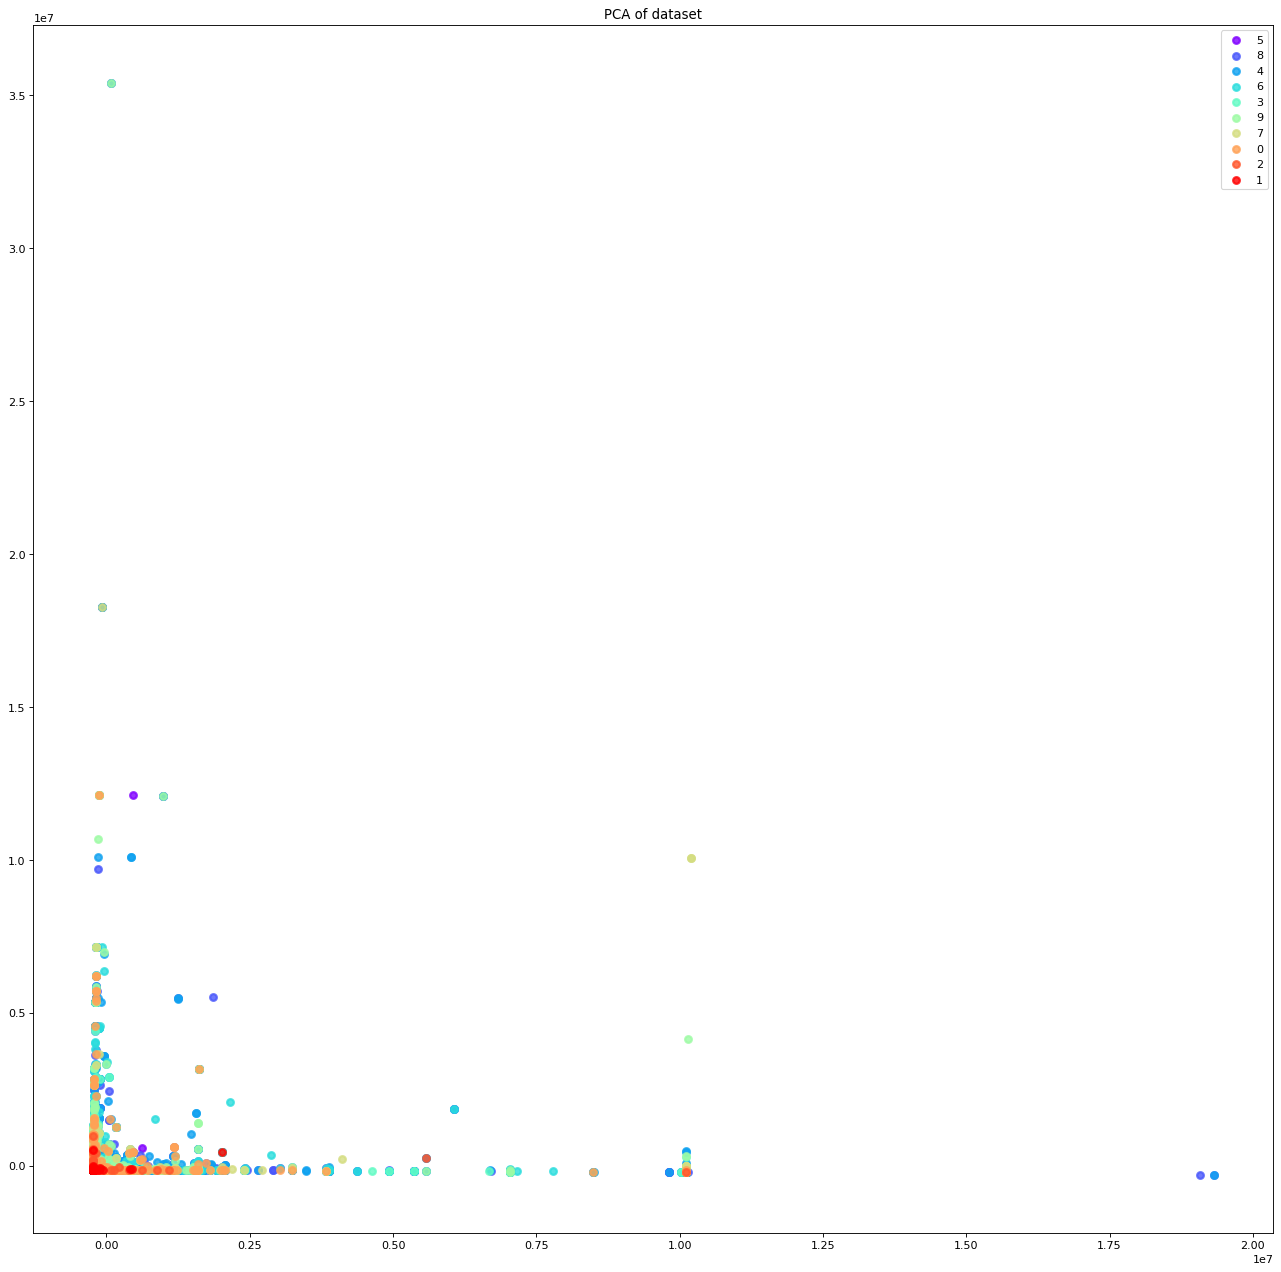

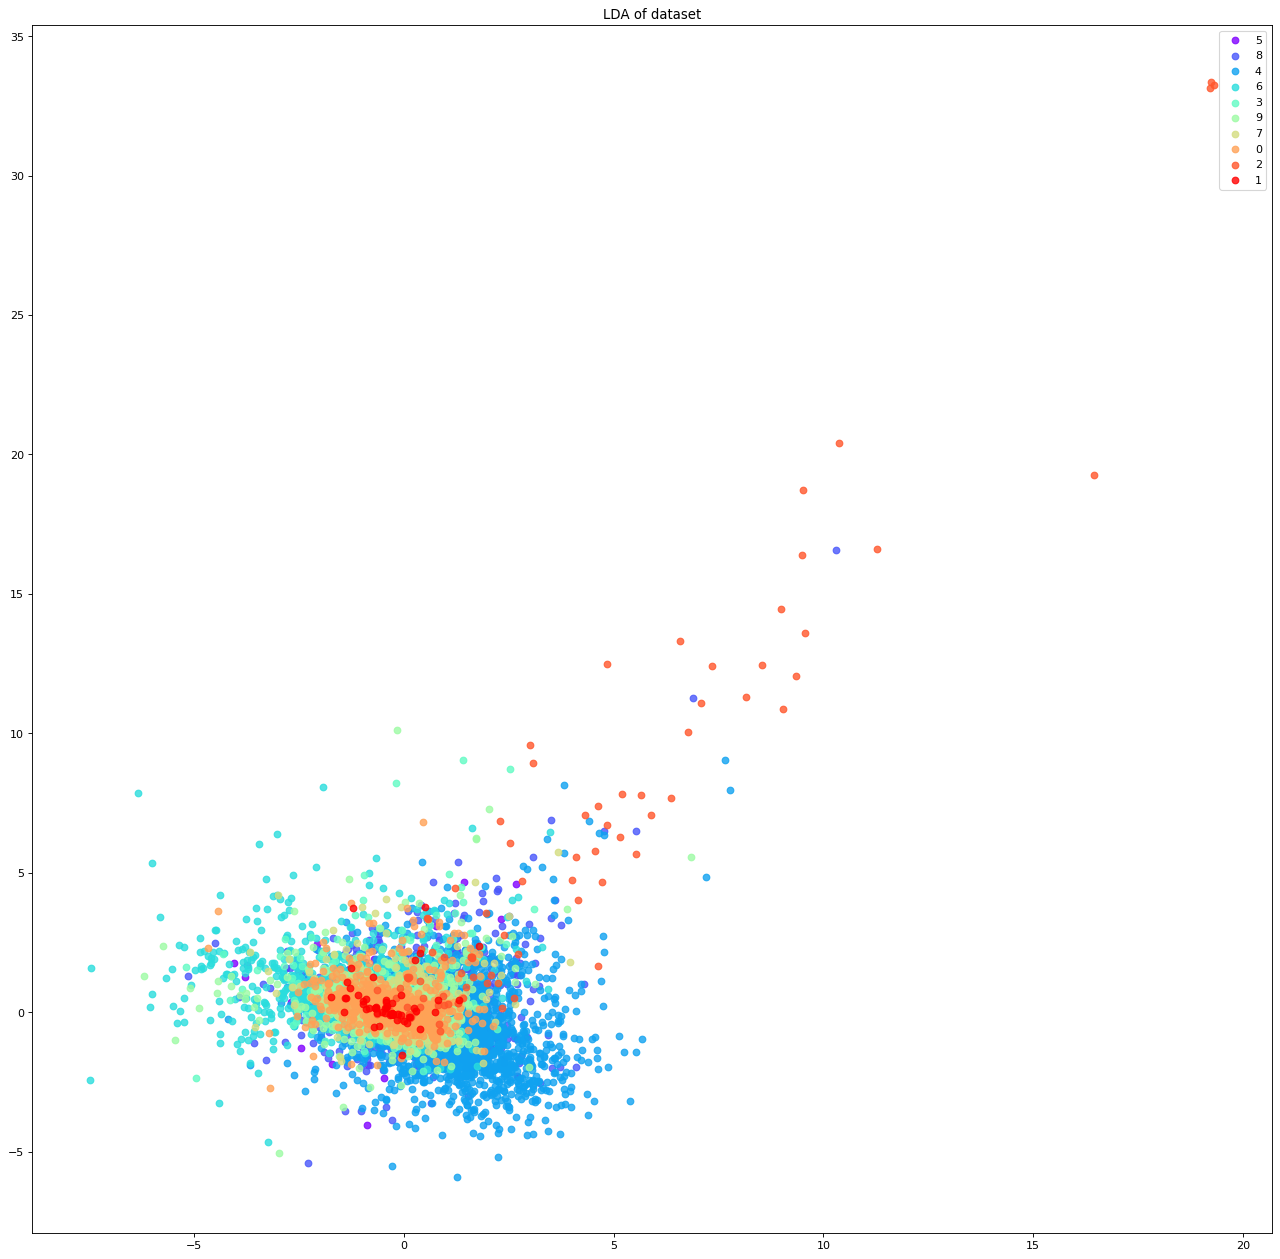

In [254]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


X = tr_df.loc[:, tr_df.columns != 'okved2']
y = tr_df.loc[:, ['okved2']]

X = X.loc[y['okved2']<10, :]
y = y.loc[y['okved2']<10, :]
target_names = y.iloc[:,0].unique()
print(target_names)

cmap = cm.rainbow(np.linspace(0, 1, len(target_names)))


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# print(X_r.shape, (y==6).values.shape)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,20), dpi=80)
lw = 2

for color, target_name in zip(cmap, target_names):
    plt.scatter(X_r[np.where((y==target_name).values), 0], 
                X_r[np.where((y==target_name).values), 1], 
                color=color, alpha=.8, lw=lw,
                label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure(figsize=(20,20), dpi=80)
for color, target_name in zip(cmap, target_names):
    plt.scatter(X_r2[np.where((y==target_name).values), 0], 
                X_r2[np.where((y==target_name).values), 1], 
                alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()